In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import glob
import os.path


import yfinance as yf
import time
import datetime
from datetime import datetime

import openpyxl
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import string
from openpyxl import Workbook
from openpyxl.styles import Color, PatternFill, Font, Border
from openpyxl.styles.differential import DifferentialStyle
from openpyxl.formatting.rule import ColorScaleRule, CellIsRule, FormulaRule
import xlsxwriter
import random as rand

# Coin Flipping Game

In [42]:
coin_portfolios=pd.DataFrame()
total_flips=100
total_runs=10000
for run in range(1, total_runs+1):
    value=1
    for year in range(1, total_flips+1):
        coin_portfolios.at[year, run]=value
        flip=rand.randrange(2)
        #tails
        if(flip==1):
            #40% loss
            value=value*0.6
        #heads
        else:
            #60% gain
            value=value*1.6

In [43]:
coin_final_state=coin_portfolios.loc[total_flips].values
coin_portfolio_min=min(coin_final_state)
coin_portfolio_max=max(coin_final_state)
coin_portfolio_mean=np.mean(coin_final_state)
coin_portfolio_median=np.median(coin_final_state)
coin_portfolio_geo_mean=1.0
n=len(coin_final_state)
for i in coin_final_state:
    coin_portfolio_geo_mean = (coin_portfolio_geo_mean)*((i)**(1/n))
print("Min: ", coin_portfolio_min)
print("Max: ", coin_portfolio_max)
print("Mean: ", coin_portfolio_mean)
print("Median: ", coin_portfolio_median)
print("Geometric Mean: ", coin_portfolio_geo_mean)

Min:  9.206579158790493e-11
Max:  26842089.170242373
Mean:  5066.280761455896
Median:  0.21647632253673113
Geometric Mean:  0.14195760150828743


<IPython.core.display.Javascript object>


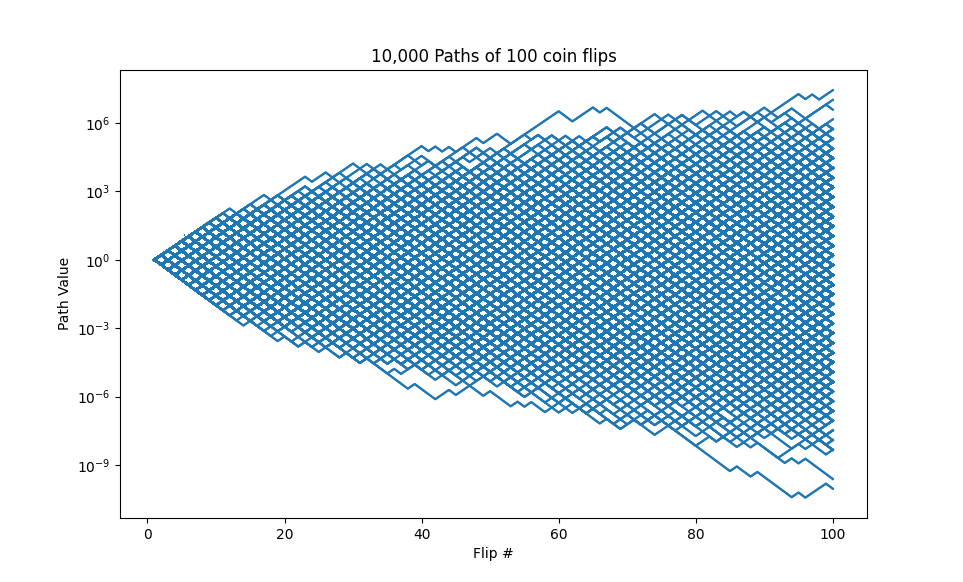

In [48]:
plt.figure()
plt.yscale("log")

_ =plt.plot(coin_portfolios.index , coin_portfolios, color='C0')
plt.title('10,000 Paths of 100 coin flips')
_= plt.plot(coin_portfolios.index , coin_portfolios, color='C0')
_= plt.xlabel('Flip #') 
_= plt.ylabel('Path Value') 


In [50]:
profit_count=0
for path in coin_final_state:
    if(path<=0.01):
        profit_count=profit_count+1
print(profit_count/10000)

0.2655


In [54]:
np.percentile(coin_final_state, 95)

553.554339595246

In [57]:
kelly_portfolios=pd.DataFrame()

mean=[]
median=[]
geo_mean=[]

bet_array=np.arange(0.01, 1, 0.01)
total_runs=1000
for bet_size in bet_array:
    for run in range(1, total_runs+1):
        value=1
        for year in range(1, total_flips+1):
            kelly_portfolios.at[year, run]=value
            flip=rand.randrange(2)
            #tails
            if(flip==1):
                #40% loss
                value=value*(1-bet_size)+value*bet_size*0.6
            #heads
            else:
                #60% gain
                value=value*(1-bet_size)+value*bet_size*1.6
    kelly_final_state=kelly_portfolios.loc[total_flips].values
    kelly_portfolio_mean=np.mean(kelly_final_state)
    kelly_portfolio_median=np.median(kelly_final_state)
    kelly_portfolio_geo_mean=1.0
    n=len(kelly_final_state)
    for i in kelly_final_state:
        kelly_portfolio_geo_mean = (kelly_portfolio_geo_mean)*((i)**(1/n))
    mean.append(kelly_portfolio_mean)
    median.append(kelly_portfolio_median)
    geo_mean.append(kelly_portfolio_geo_mean)

<IPython.core.display.Javascript object>


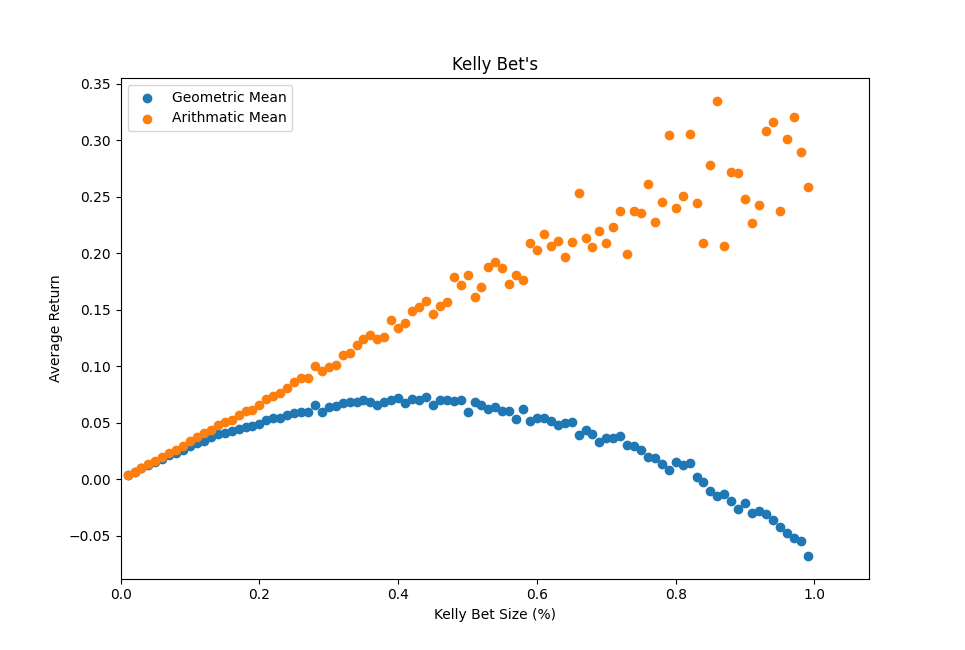

In [62]:
mean_cagr=[]
median_cagr=[]
geo_mean_cagr=[]

for item in mean:
    mean_cagr.append(item**(1/total_years)-1)
for item in median:
    median_cagr.append(item**(1/total_years)-1)
for item in geo_mean:
    geo_mean_cagr.append(item**(1/total_years)-1)
plt.figure()
plt.scatter(bet_array,geo_mean_cagr)
plt.scatter(bet_array,mean_cagr)
plt.title("Kelly Bet's")
plt.xlabel("Kelly Bet Size (%)")
plt.ylabel("Average Return")
plt.legend(['Geometric Mean', 'Arithmatic Mean'])

In [63]:
kelly_portfolios=pd.DataFrame()
kelly_data=[]
bet_size=0.4167
total_runs=10000
total_flips=100

for run in range(1, total_runs+1):
    value=1
    for year in range(1, total_flips+1):
        kelly_portfolios.at[year, run]=value
        flip=rand.randrange(2)
        #tails
        if(flip==1):
            #40% loss
            value=value*(1-bet_size)+value*bet_size*0.6
        #heads
        else:
            #60% gain
            value=value*(1-bet_size)+value*bet_size*1.6

In [65]:
kelly_final_state=kelly_portfolios.loc[total_flips].values
kelly_portfolio_min=min(kelly_final_state)
kelly_portfolio_max=max(kelly_final_state)
kelly_portfolio_mean=np.mean(kelly_final_state)
kelly_portfolio_median=np.median(kelly_final_state)
kelly_portfolio_geo_mean=1
n=len(kelly_final_state)
for i in kelly_final_state:
    kelly_portfolio_geo_mean = (kelly_portfolio_geo_mean)*((i)**(1/n))
print("Min: ", kelly_portfolio_min)
print("Max: ", kelly_portfolio_max)
print("Mean: ", kelly_portfolio_mean)
print("Median: ", kelly_portfolio_median)
print("Geometric Mean: ", kelly_portfolio_geo_mean)

Min:  0.004165130031009261
Max:  13662.15958388395
Mean:  52.00679552341495
Median:  6.159158505885548
Geometric Mean:  7.316072823020528


<IPython.core.display.Javascript object>


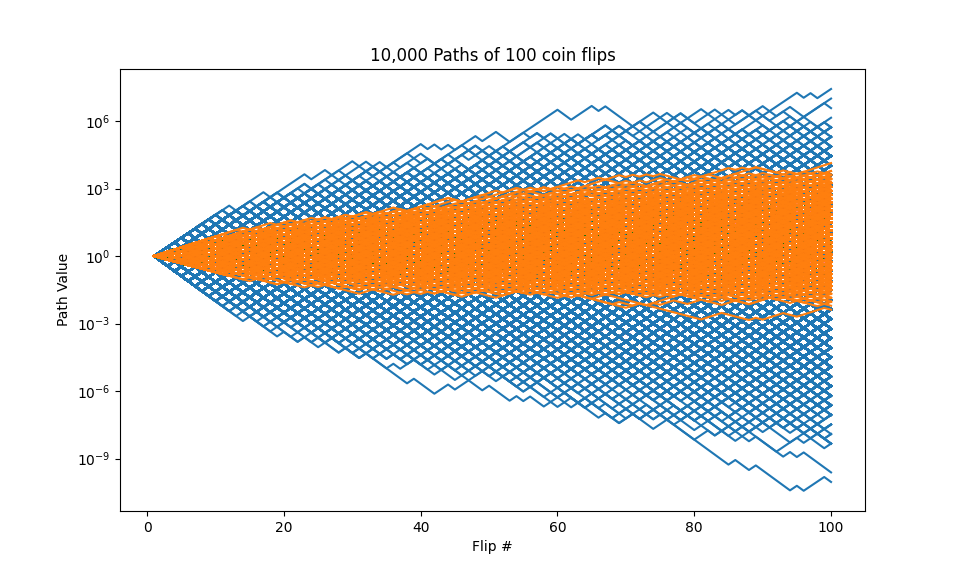

In [67]:
plt.figure()
plt.yscale("log")
_  =plt.plot(coin_portfolios.index , coin_portfolios, color='C0')
__ =plt.plot(kelly_portfolios.index , kelly_portfolios, color='C1')
plt.title('10,000 Paths of 100 coin flips')

_= plt.xlabel('Flip #') 
_= plt.ylabel('Path Value') 
#plt.legend(['Full Bet', 'Optimized Kelly Bet'])

In [68]:
profit_count=0
for path in kelly_final_state:
    if(path<=0.01):
        profit_count=profit_count+1
print(profit_count/10000)

0.0006


In [69]:
np.percentile(kelly_final_state, 95)

157.89291133814334